## A COLOR ORDER SYSTEM AND COLOR DIFFERENCE SPECIFICATION
- AP 187: Activity 4
- Name: Gelli Mae P. Gloria
- Student Number: 2015-06435

#### Objectives:
- Transform the CIE xy of Activity 3 into IE u'v'
- Using 3 randomly picked chips from the munsell file, calculate the color differences between the observed color under D65 and white LED
- Remark if the color difference is noticeable

### Preliminaries:
Import all important packages

In [27]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.io as sio
import pandas as pd

In [28]:
# Define functions

def XYZ(data, file, planck, munsell, j):
    # Function for computing the tristimuus values of the colored object illuminated by the specific
    #    light source
    P_illum = file['Spectral Power']    # Illuminating light's spectral power
    den = X + Y + Z
    file1 = pd.DataFrame()
    for i in temp:
        file1['X'+str(i)] = data['x10bar(l)']*P_illum*planck['Temp='+str(i)]#*munsell[:,j] # X
        file1['Y'+str(i)] = data['y10bar(l)']*P_illum*planck['Temp='+str(i)]#*munsell[:,j] # Y
        file1['Z'+str(i)] = data['z10bar(l)']*P_illum*planck['Temp='+str(i)]#*munsell[:,j] # Z
    return file1

def xy(file):
    # For the Planckian locus
    a = []
    b = []
    for i in temp:
        X = file['X'+str(i)].sum()
        Y = file['Y'+str(i)].sum()
        Z = file['Z'+str(i)].sum()
        x = 4*X/(X+15*Y+3*Z)
        y = 9*Y/(X+15*Y+3*Z)
        a.append(x)
        b.append(y)
    return a,b

def rang(start, end, step):
    i = start
    while i <= end:
        yield i
        i += step

### Read and Load Data
We use pandas and scipy packages for the reading and loading of the necessary files for this activity.

In [33]:
data = pd.read_csv('CIE standard observer-1964.csv')
data1 = pd.read_csv('illuminant d65.csv')
file = pd.DataFrame()
data = pd.DataFrame(data)
data1 = pd.DataFrame(data1)
munsell = sio.loadmat("munsell400_700_5.mat")

data_illum = data1.iloc[15:97].reset_index()
data_illum = data_illum.rename(columns = {'300':'Wavelength'})
data_illum = data_illum.rename(columns = {'0.04':'Spectral Power'})
# data_illum = data_illum.drop(columns = 'level_0')

data3 = data.loc[4:64].reset_index()
data_illum1 = data_illum.loc[4:64].reset_index()

data.head()
munsell = munsell['munsell']
data.tail()

,l.nm,x10bar(l),y10bar(l),z10bar(l)
77,765,0.000090,0.000036,0.000000
78,770,0.000065,0.000025,0.000000
79,775,0.000046,0.000018,0.000000
80,780,0.000033,0.000013,0.000000
81,Sum.:,23.329353,23.332036,23.334153


### Spectral Power Distribution of the Illuminant D65 

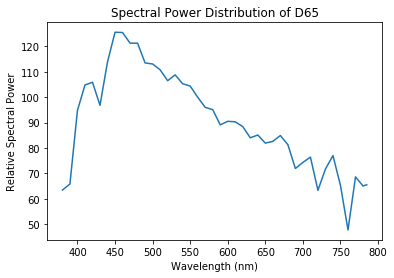

In [29]:
plt.plot(data_illum['Wavelength'],data_illum['Spectral Power'])
plt.title("CIE D65")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Relative Spectral Power")

# plt.show()
# legend()
# xlabel('Wavelength (nm)')
# ylim(0,300)
# ylabel('Relative Spectral Power')
plt.title('Spectral Power Distribution of D65')
plt.savefig("CIE_D65.png", bbox_inches="tight", dpi=300)

array([1.6000000e-04, 6.6200000e-04, 2.3620000e-03, 7.2420000e-03,
       1.9110000e-02, 4.3400000e-02, 8.4736000e-02, 1.4063800e-01,
       2.0449200e-01, 2.6473700e-01, 3.1467900e-01, 3.5771900e-01,
       3.8373400e-01, 3.8672600e-01, 3.7070200e-01, 3.4295700e-01,
       3.0227300e-01, 2.5408500e-01, 1.9561800e-01, 1.3234900e-01,
       8.0507000e-02, 4.1072000e-02, 1.6172000e-02, 5.1320000e-03,
       3.8160000e-03, 1.5444000e-02, 3.7465000e-02, 7.1358000e-02,
       1.1774900e-01, 1.7295300e-01, 2.3649100e-01, 3.0421300e-01,
       3.7677200e-01, 4.5158400e-01, 5.2982600e-01, 6.1605300e-01,
       7.0522400e-01, 7.9383200e-01, 8.7865500e-01, 9.5116200e-01,
       1.0141600e+00, 1.0743000e+00, 1.1185200e+00, 1.1343000e+00,
       1.1239900e+00, 1.0891000e+00, 1.0304800e+00, 9.5074000e-01,
       8.5629700e-01, 7.5493000e-01, 6.4746700e-01, 5.3511000e-01,
       4.3156700e-01, 3.4369000e-01, 2.6832900e-01, 2.0430000e-01,
       1.5256800e-01, 1.1221000e-01, 8.1261000e-02, 5.7930000e

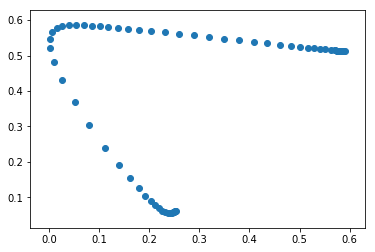

In [42]:
X = np.array(data['x10bar(l)'])
Y = np.array(data['y10bar(l)'])
Z = np.array(data['z10bar(l)'])
P_illum = np.array(data_illum['Spectral Power'])
den = X + Y + Z

#compute for the tristimulus value of the monochromatic light source
Xn = (X * P_illum)
Yn = (Y * P_illum)
Zn = (Z * P_illum)

den_prime = Xn + (15*Yn) + (3*Zn)
u_prime = (4*Xn) / den_prime
v_prime = (9*Yn) / den_prime
uv = pd.DataFrame(u_prime,v_prime)
# np.array([0, 2, 4, 6]) + np.array([1, 1, 1, 1])
plt.scatter(u_prime[:81], v_prime[:81])

X

In [7]:
#X, Y, Z already given in Activity 3 dataset

def xy_to_uv(data, file, munsell):
    
    X = np.array(data['x10bar(l)'])
    Y = np.array(data['y10bar(l)'])
    Z = np.array(data['z10bar(l)'])
    
    P_illum = np.array(file['Spectral Power'])
    den = X + Y + Z

    #compute for the tristimulus value of the monochromatic light source
    Xn = (X * P_illum * munsell[:,0])
    Yn = (Y * P_illum * munsell[:,0])
    Zn = (Z * P_illum * munsell[:,0])
    den1 = Xn + Yn + Zn
    

  #compute for L*
    Y_ratio = Yn / Y
    cond = (6/29)**3
    L_star = np.zeros(Y_ratio.shape)

    for index, val in enumerate(Y_ratio):
        if val <= cond:
            L_star[index] = (val * (29/3)**3)
        else:
            L_star[index] = ((116 * val**(1/3)) - 16)

    #compute for u' and v'
    den_prime = Xn + (15*Yn) + (3*Zn)
    u_prime = (4*Xn) / den_prime
    v_prime = (9*Yn) / den_prime

    #compute for u_n' and v_n'
    den_prime_n = X + (15*Y) + (3*Z)
    u_prime_n = (4*X) / den_prime_n
    v_prime_n = (9*Y) / den_prime_n

    #compute for u* and v*
    u_star = (13*L_star)*(u_prime - u_prime_n)
    v_star = (13*L_star)*(v_prime - v_prime_n)

    return L_star, u_star, v_star, u_prime, v_prime


In [8]:
L_star, u_star, v_star, u_prime, v_prime = xy_to_uv(data3, data_illum1, munsell)
u_star.shape
X = np.array(data['x10bar(l)']).sum()
X

46.658706

In [11]:
# Defined functions
def M_e(lambd,T):
    kB = 1.380649*10**(-23)/((10**(-9))**2)
    c = 3*10**17
    h = 6.6262*10**(-34)/((10**(-9))**2)
    M_e = (2*h*c**2)/((lambd**5)*((np.exp((h*c)/(lambd*kB*T))-1)))
    return M_e

E = np.linspace(400,700, 61)

In [10]:
# A = plot(E,(M_e(E, 1000)/(M_e(560, 1000)))*100, label = 'T = 1000K')
# B = plot(E,M_e(E, 2500)/(M_e(560, 2500))*100, label = 'T = 2500K')
# C = plot(E,M_e(E, 5400)/(M_e(560, 5400))*100, label = 'T = 5400K')
# D = plot(E,M_e(E, 6500)/(M_e(560, 6500))*100, label = 'T = 6500K')

# legend()
# xlabel('Wavelength (nm)')
# ylim(0,300)
# ylabel('Relative Spectral Power')
# title('Spectral Power Distribution of a Blackbody Radiator')

In [14]:
temp = [i for i in rang(1000, 10000, 1000)]
planck = pd.DataFrame()
for i in temp:
    planck['Temp='+ str(i)]= ((M_e(E, i)))
temp

[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

In [15]:
yow = XYZ(data3, data_illum1, planck, munsell, 3)
yow.head()

,X1000,Y1000,Z1000,X2000,Y2000,Z2000,X3000,Y3000,Z3000,X4000,...,Z7000,X8000,Y8000,Z8000,X9000,Y9000,Z9000,X10000,Y10000,Z10000
0,4.918854e-09,5.158233e-10,2.213896e-08,0.322170,0.033785,1.450034,129.865775,13.618577,584.504719,2607.649545,...,5.583922e+05,2.371950e+05,24873.819157,1.067576e+06,3.939133e+05,41308.338137,1.772940e+06,5.930614e+05,62192.306527,2.669273e+06
1,1.723587e-08,1.790703e-09,7.828419e-08,0.903978,0.093918,4.105808,338.378113,35.155459,1536.891557,6547.566163,...,1.349587e+06,5.637475e+05,58569.985013,2.560505e+06,9.307456e+05,96698.895683,4.227387e+06,1.394858e+06,144917.403614,6.335356e+06
2,5.127243e-08,5.298118e-09,2.355993e-07,2.165038,0.223719,9.948452,753.927418,77.905359,3464.332786,14070.938223,...,2.802120e+06,1.148346e+06,118661.714863,5.276706e+06,1.885113e+06,194793.842645,8.662186e+06,2.812483e+06,290621.492632,1.292350e+07
3,1.229192e-07,1.263470e-08,5.740155e-07,4.200749,0.431790,19.616915,1363.221764,140.123820,6366.057009,24561.480002,...,4.752453e+06,1.902500e+06,195555.511283,8.884410e+06,3.105790e+06,319240.128375,1.450361e+07,4.613488e+06,474214.541215,2.154435e+07
4,2.557541e-07,2.675330e-08,1.216339e-06,7.109561,0.743700,33.812309,2153.711556,225.290202,10242.820964,37491.705940,...,7.071100e+06,2.759818e+06,288692.338111,1.312540e+07,4.480980e+06,468735.413675,2.131106e+07,6.628035e+06,693329.333632,3.152222e+07


In [16]:
a = xy(yow)
name = pd.DataFrame()
name['Temp'] = temp
name['x1'] = a[0]
name['y1'] = a[1]
name
name.to_excel('planckian1.xlsx')

[]

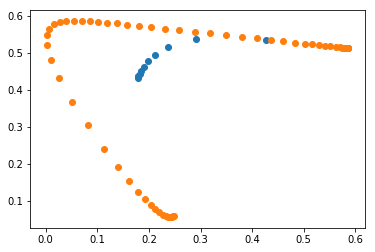

In [17]:
plt.scatter(name['x1'],name['y1'])
# plt.scatter(data['X'], data['Y'])
plt.scatter(u_prime[:81],v_prime[:81])
plt.plot()

In [18]:
# defining function to calculate a* and b*

def f(s):
    t = (6/29)**3
    if s > t:
            return s**(1/3)
    else:
        return (7.787*s)+(16/116)
    
def L(Y_ratio):
    
    cond = (6/29)**3

    if Y_ratio <= cond:
        return (Y_ratio * (29/3)**3)
    else:
        return ((116 * Y_ratio**(1/3)) - 16)
    
def xy_to_ab(data, file, j):
    
    x = np.array(data['x10bar(l)'])
    y = np.array(data['y10bar(l)'])
    z = np.array(data['z10bar(l)'])
    
    P = np.array(file['Spectral Power'])
    R =  munsell[:,j] 

  #tristimulus value of colored object with D65 illuminant
    X = np.sum(x * P * R)
    Y = (y * P * R).sum()
    Z = (z * P * R).sum()

    #compute for the tristimulus value of the light source
    Xn = (x * P).sum()
    Yn = (y * P).sum()
    Zn = (z * P).sum()

    #comput for a* and b*
    a_star = 500 * (f(X/Xn) - f(Z/Zn))
    b_star = 500 * (f(Y/Yn) - f(Z/Zn))
    
    # compute for L*:
    Y_ratio = Y/Yn
    L_star = L(Y_ratio)

    return a_star, b_star, L_star

In [21]:
df_whiteLED = pd.read_excel('LED flashlight.xlsx')
df_whiteLED['wavelength (nm)'] = df_whiteLED['wavelength (nm)'].astype(int)

#select only first duplicate
df_whiteLED.drop_duplicates(subset = ['wavelength (nm)'], keep = 'first', inplace = True)
df_whiteLED_61 = df_whiteLED.loc[df_whiteLED['wavelength (nm)'].isin(data_illum1['Wavelength'])].reset_index(drop=True)
df_whiteLED_61 = df_whiteLED_61.rename(columns = {'relative power': 'Spectral Power'})

In [20]:
random = [50, 501, 1021]  # index of the chips in munsell
stars = {}
for i in random:
    star_D65 = xy_to_ab(data3, data_illum1, i)
    star_LED = xy_to_ab(data3, df_whiteLED_61, i)
    stars['D65_'+str(i)] = star_D65
    stars['LED_'+str(i)] = star_LED
stars

{'D65_50': (-77.42461923297395, -48.473128341518176, 64.16894977571542),
 'LED_50': (-92.80524933872991, -64.76321169498256, 62.44696206056359),
 'D65_501': (6.102744521385095, 1.216058355599292, 84.69376158519881),
 'LED_501': (8.407026986926525, 3.3457741829209797, 84.89863768426324),
 'D65_1021': (-10.89393544678935, 1.6915904084406908, 92.94450163641959),
 'LED_1021': (-9.77432224084046, 0.23101940774072904, 93.35243729663746)}

In [22]:
# Compute for the differences between the a*, b*, and L* of the D65 and LED
diff1 = np.array(stars['D65_'+str(random[0])])-np.array(stars['LED_'+str(random[0])])
diff2 = np.array(stars['D65_'+str(random[1])])-np.array(stars['LED_'+str(random[1])])
diff3 = np.array(stars['D65_'+str(random[2])])-np.array(stars['LED_'+str(random[2])])
dE = np.sqrt(diff1[2]**2 + diff1[0]**2 + diff1[1]**2)
dE1 = np.sqrt(diff2[2]**2 + diff2[0]**2 + diff2[1]**2)
dE2= np.sqrt(diff3[2]**2 + diff3[0]**2 + diff3[1]**2)
dE, dE1, dE2
# diff1, diff2, diff3

(22.469887400786806, 3.1444206782989528, 1.8849967856466572)

In [23]:
L_diff = stars['D65_'+str(random[0])][0]-stars['LED_'+str(random[0])][0]
C1 = np.sqrt(stars['D65_'+str(random[0])][1]**2+stars['D65_'+str(random[0])][2]**2)
C2 = np.sqrt(stars['LED_'+str(random[0])][1]**2+stars['LED_'+str(random[0])][2]**2)
h1 = np.arctan((stars['D65_'+str(random[0])][2])/(stars['D65_'+str(random[0])][1]))
h2 = np.arctan((stars['LED_'+str(random[0])][2])/(stars['LED_'+str(random[0])][1]))
dE_euc = np.sqrt(L_diff**2 + (-C1+C2)**2 + (-h1+ h2)**2)
dE_euc

L_diff = stars['D65_'+str(random[1])][0]-stars['LED_'+str(random[1])][0]

C1 = np.sqrt(stars['D65_'+str(random[1])][1]**2+stars['D65_'+str(random[1])][2]**2)
C2 = np.sqrt(stars['LED_'+str(random[1])][1]**2+stars['LED_'+str(random[1])][2]**2)

h1 = np.arctan((stars['D65_'+str(random[1])][2])/(stars['D65_'+str(random[1])][1]))
h2 = np.arctan((stars['LED_'+str(random[1])][2])/(stars['LED_'+str(random[1])][1]))
dE_euc2 = np.sqrt(L_diff**2 + (-C1+C2)**2 + (-h1+ h2)**2)
dE_euc

L_diff = stars['D65_'+str(random[2])][0]-stars['LED_'+str(random[2])][0]
C1 = np.sqrt(stars['D65_'+str(random[2])][1]**2+stars['D65_'+str(random[2])][2]**2)
C2 = np.sqrt(stars['LED_'+str(random[2])][1]**2+stars['LED_'+str(random[2])][2]**2)
h1 = np.arctan((stars['D65_'+str(random[2])][2])/(stars['D65_'+str(random[2])][1]))
h2 = np.arctan((stars['LED_'+str(random[2])][2])/(stars['LED_'+str(random[2])][1]))
dE_euc3 = np.sqrt(L_diff**2 + (-C1+C2)**2 + (-h1+ h2)**2)
dE_euc, dE_euc2, dE_euc3

(18.103186390016972, 2.319269968774031, 1.1866321330974903)